In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import layers
from keras import models
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os, shutil
import numpy as np

Using TensorFlow backend.


Hello

In [2]:
train_dir = 'dataset/project2/cat-and-dog-small/train'
validation_dir = 'dataset/project2/cat-and-dog-small/validation'
train_cats_dir = 'dataset/project2/cat-and-dog-small/train/cats'
train_dogs_dir = 'dataset/project2/cat-and-dog-small/train/dogs'

In [5]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

In [6]:
rand_nbr = np.random.randint(low=1, high=100, size=2)

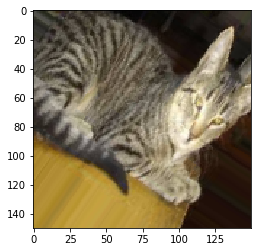

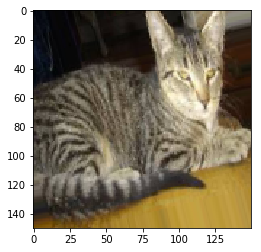

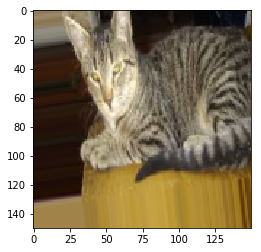

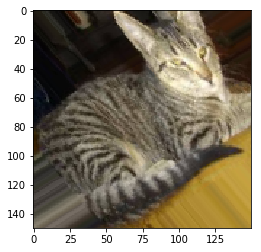

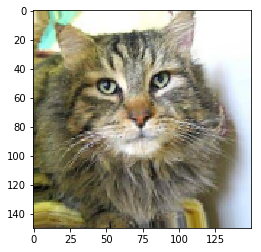

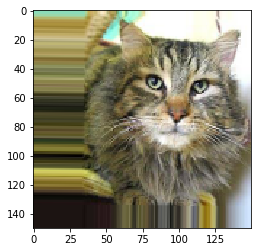

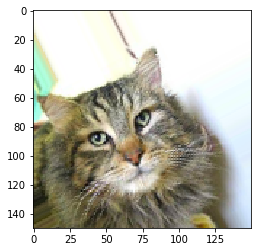

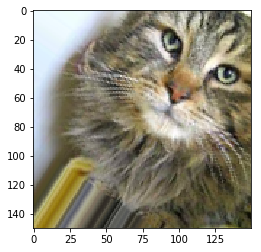

In [7]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
rand_nbr = np.random.randint(low=1, high=100, size=2)
for i in range(len(rand_nbr)):
    img_path = fnames[i]
    img = image.load_img(img_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1):
        plt.figure(i)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 4 == 0:
            break
    plt.show()

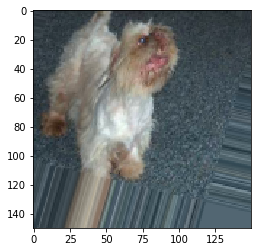

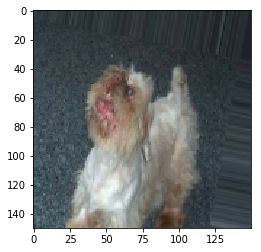

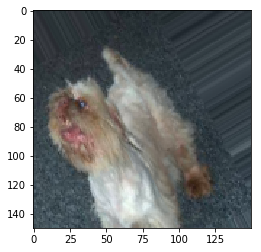

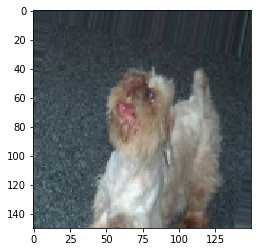

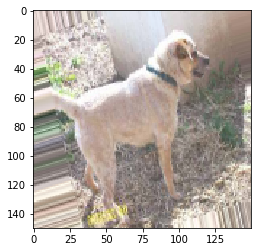

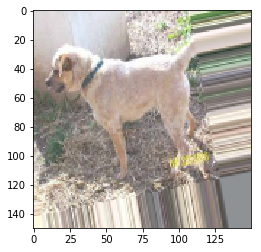

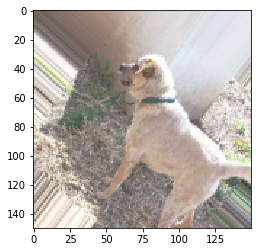

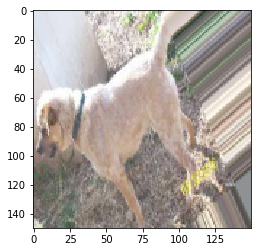

In [8]:
fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]
rand_nbr = np.random.randint(low=1, high=100, size=2)
for i in range(len(rand_nbr)):
    img_path = fnames[i]
    img = image.load_img(img_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1):
        plt.figure(i)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 4 == 0:
            break
    plt.show()

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
                        train_dir,
                        target_size=(150, 150),
                        batch_size=20,
                        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [11]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size = 20,
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [12]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [13]:
model_wo_dropout = models.Sequential()
model_wo_dropout.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_wo_dropout.add(layers.MaxPooling2D((2, 2)))
model_wo_dropout.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_wo_dropout.add(layers.MaxPooling2D((2, 2)))
model_wo_dropout.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_wo_dropout.add(layers.MaxPooling2D((2, 2)))
model_wo_dropout.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_wo_dropout.add(layers.MaxPooling2D((2, 2)))
model_wo_dropout.add(layers.Flatten())
model_wo_dropout.add(layers.Dense(512, activation='relu'))
model_wo_dropout.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model_wo_dropout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [15]:
model_wo_dropout.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [16]:
history1 = model_wo_dropout.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 61s 605ms/step - loss: 0.6888 - acc: 0.5415 - val_loss: 0.6700 - val_acc: 0.6360
Epoch 2/30
100/100 [==============================] - 54s 540ms/step - loss: 0.6475 - acc: 0.6175 - val_loss: 0.6372 - val_acc: 0.6210
Epoch 3/30
100/100 [==============================] - 50s 503ms/step - loss: 0.6033 - acc: 0.6685 - val_loss: 0.6321 - val_acc: 0.6310
Epoch 4/30
100/100 [==============================] - 50s 502ms/step - loss: 0.5677 - acc: 0.7060 - val_loss: 0.6580 - val_acc: 0.6160
Epoch 5/30
100/100 [==============================] - 50s 498ms/step - loss: 0.5401 - acc: 0.7240 - val_loss: 0.6072 - val_acc: 0.6630
Epoch 6/30
100/100 [==============================] - 50s 504ms/step - loss: 0.5206 - acc: 0.7430 - val_loss: 0.5941 - val_acc: 0.6750
Epoch 7/30
100/100 [==============================] - 50s 498ms/step - loss: 0.4980 - acc: 0.7490 - val_loss: 0.5783 - val_acc: 0.6910
Epoch 8/30
100/100 [==============================] - 5

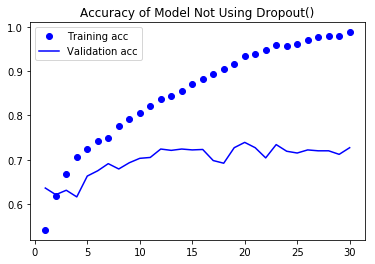

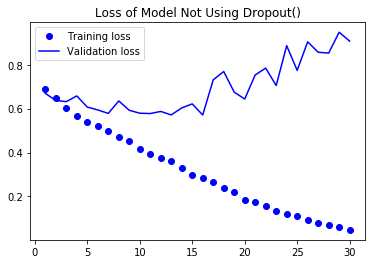

In [32]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Accuracy of Model Not Using Dropout()')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Loss of Model Not Using Dropout()')
plt.legend()
plt.show()

In [17]:
train_datagen2 = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [18]:
test_datagen2 = ImageDataGenerator(rescale=1./255)

In [20]:
train_generator2 = train_datagen2.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [21]:
for data_batch, labels_batch in train_generator2:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


In [22]:
model_w_dropout = models.Sequential()
model_w_dropout.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_w_dropout.add(layers.MaxPooling2D((2, 2)))
model_w_dropout.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_w_dropout.add(layers.MaxPooling2D((2, 2)))
model_w_dropout.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_w_dropout.add(layers.MaxPooling2D((2, 2)))
model_w_dropout.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_w_dropout.add(layers.MaxPooling2D((2, 2)))
model_w_dropout.add(layers.Flatten())
model_w_dropout.add(layers.Dropout(0.5))
model_w_dropout.add(layers.Dense(512, activation='relu'))
model_w_dropout.add(layers.Dense(1, activation='sigmoid'))

In [29]:
model_w_dropout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [24]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='tanh'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(512, activation='tanh'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [26]:
from keras.layers import LeakyReLU

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model2.add(LeakyReLU(alpha=0.1))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3)))
model2.add(LeakyReLU(alpha=0.1))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3)))
model2.add(LeakyReLU(alpha=0.1))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3)))
model2.add(LeakyReLU(alpha=0.1))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512))
model2.add(LeakyReLU(alpha=0.1))
model2.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
__________

In [28]:
model_w_dropout.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [31]:
history2 = model_w_dropout.fit_generator(train_generator2,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 76s 759ms/step - loss: 0.6944 - acc: 0.5153 - val_loss: 0.6811 - val_acc: 0.5140
Epoch 2/30
100/100 [==============================] - 74s 738ms/step - loss: 0.6845 - acc: 0.5466 - val_loss: 0.6682 - val_acc: 0.6120
Epoch 3/30
100/100 [==============================] - 74s 740ms/step - loss: 0.6732 - acc: 0.5831 - val_loss: 0.6342 - val_acc: 0.6510
Epoch 4/30
100/100 [==============================] - 74s 741ms/step - loss: 0.6610 - acc: 0.6037 - val_loss: 0.6143 - val_acc: 0.6670
Epoch 5/30
100/100 [==============================] - 74s 738ms/step - loss: 0.6459 - acc: 0.6291 - val_loss: 0.6136 - val_acc: 0.6590
Epoch 6/30
100/100 [==============================] - 74s 740ms/step - loss: 0.6330 - acc: 0.6431 - val_loss: 0.6323 - val_acc: 0.6470
Epoch 7/30
100/100 [==============================] - 74s 740ms/step - loss: 0.6149 - acc: 0.6653 - val_loss: 0.5721 - val_acc: 0.7050
Epoch 8/30
100/100 [==============================] - 7

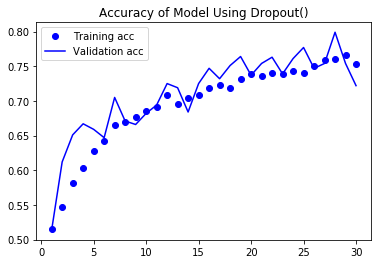

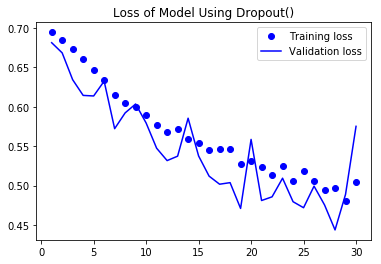

In [33]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Accuracy of Model Using Dropout()')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Loss of Model Using Dropout()')
plt.legend()
plt.show()

/home/minhdoan/anaconda3/envs/neural-network/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


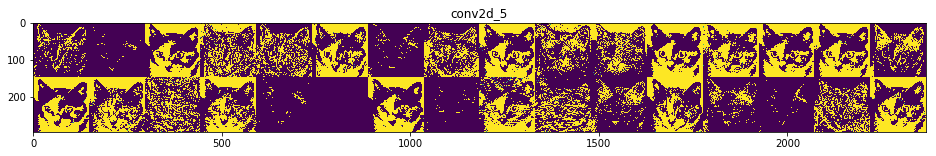

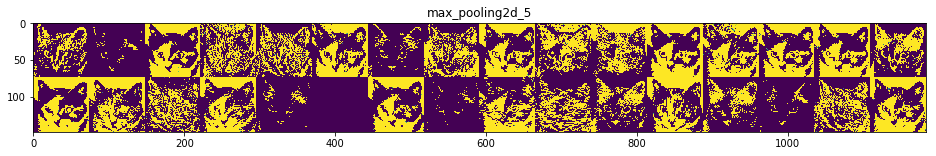

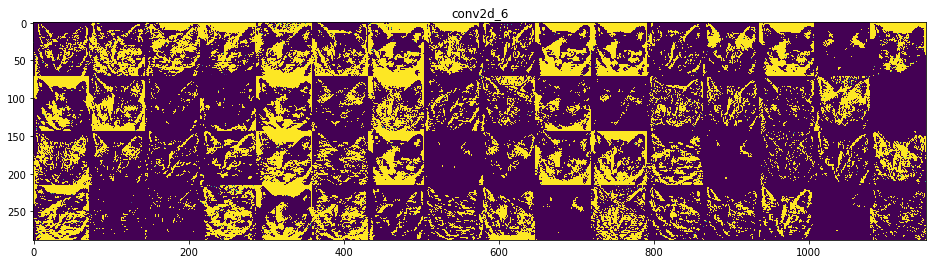

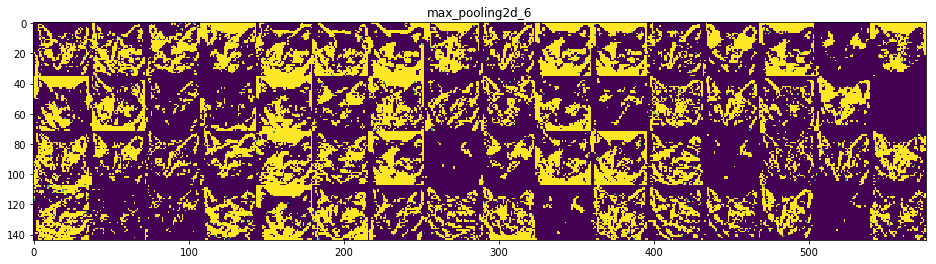

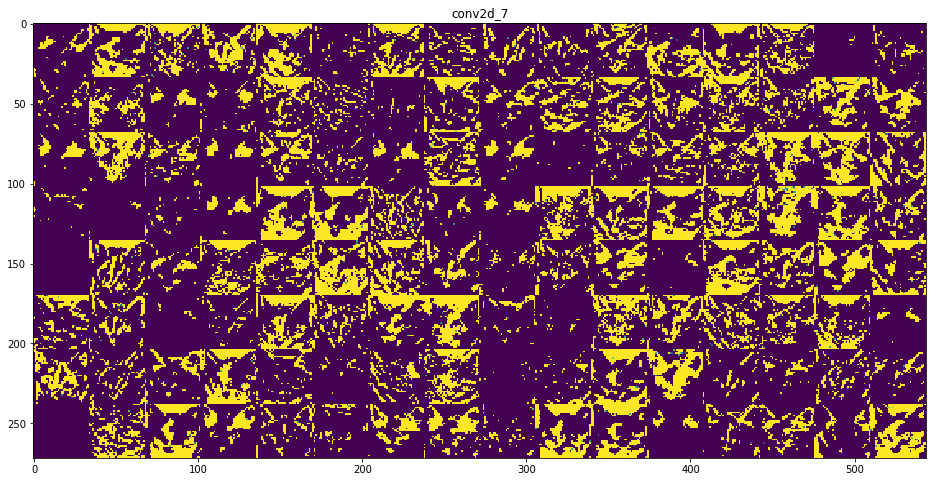

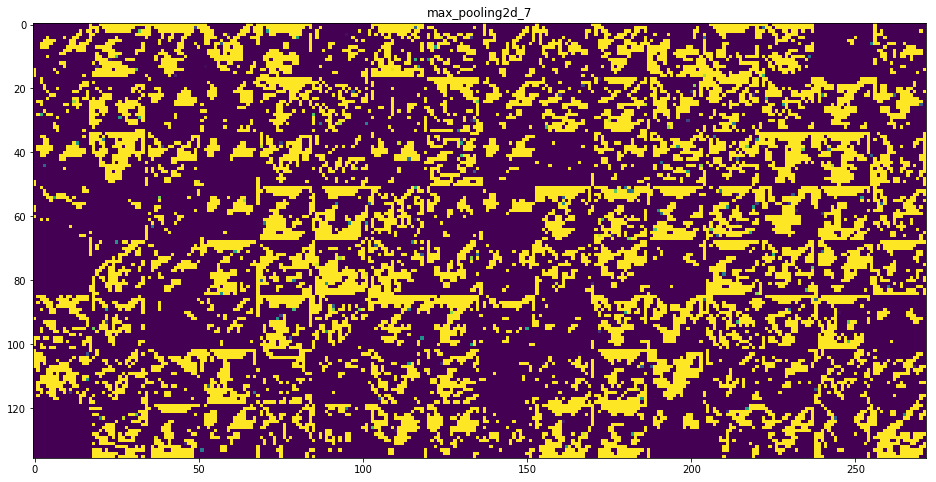

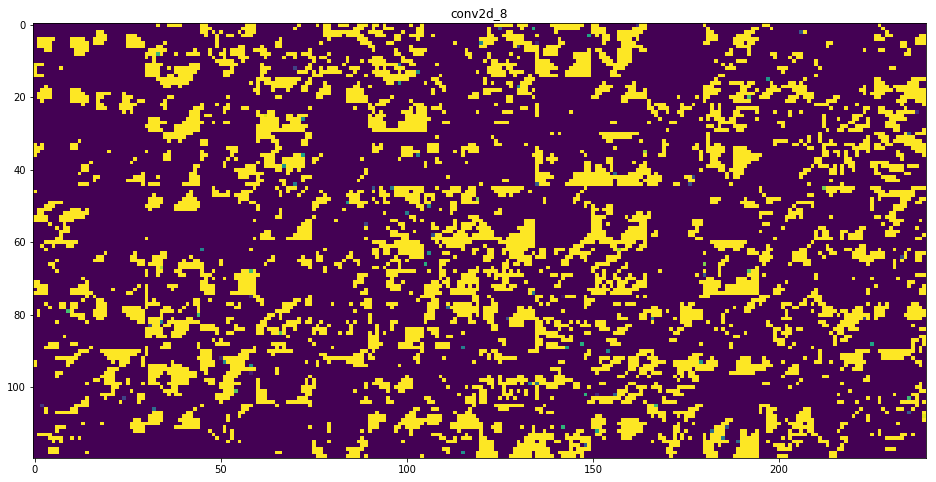

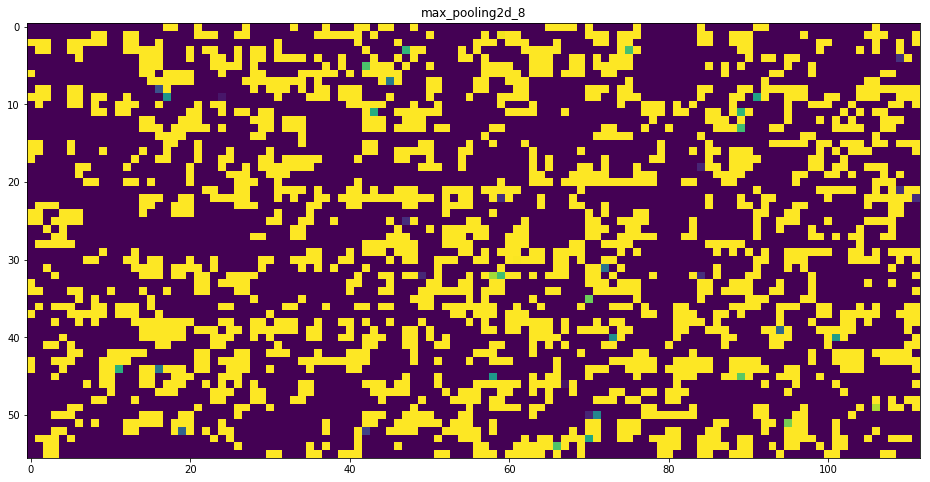

In [36]:
img_path = 'dataset/project2/cat-and-dog-small/test/cats/cat.1700.jpg'

#Preprocesses the image into a 4D tensor
img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255 #Model was trained on inputs preprocessed this way

#Extracts the outputs of the top eight layers
layer_outputs = [layer.output for layer in model_w_dropout.layers[:8]]
#Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model_w_dropout.input, outputs=layer_outputs)

#Running the model in predict mode
#Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]

#Visualizing every channel in every intermediate activation

#Names of the layers, so you can have them as part of your plot
layer_names = []
for layer in model_w_dropout.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

#Displays the feature maps
for layer_name, layer_activation in zip(layer_names, activations):
#Number of features in the feature map
    n_features = layer_activation.shape[-1]
    
#The feature map has shape (l, size, size, n_features)
    size = layer_activation.shape[1]
    
#Tiles the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
#Tiles each filter into a big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:, col * images_per_row + row]
            #Post-processes the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image *= 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            #Displays the grid
            display_grid[col * size: (col + 1) * size,
                         row * size: (row + 1) * size] = channel_image
            scale = 1. / size
    plt.figure(figsize = (scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


In [37]:
model_w_dropout.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

In [38]:
history3 = model_w_dropout.fit_generator(train_generator2,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 77s 773ms/step - loss: 0.7178 - acc: 0.5469 - val_loss: 0.6775 - val_acc: 0.5380
Epoch 2/30
100/100 [==============================] - 75s 748ms/step - loss: 0.6793 - acc: 0.5703 - val_loss: 0.6530 - val_acc: 0.5930
Epoch 3/30
100/100 [==============================] - 75s 745ms/step - loss: 0.6419 - acc: 0.6344 - val_loss: 0.5624 - val_acc: 0.7180
Epoch 4/30
100/100 [==============================] - 80s 803ms/step - loss: 0.6370 - acc: 0.6397 - val_loss: 0.5841 - val_acc: 0.7220
Epoch 5/30
100/100 [==============================] - 75s 751ms/step - loss: 0.6105 - acc: 0.6716 - val_loss: 0.5884 - val_acc: 0.6880
Epoch 6/30
100/100 [==============================] - 78s 785ms/step - loss: 0.6040 - acc: 0.6778 - val_loss: 0.6415 - val_acc: 0.6430
Epoch 7/30
100/100 [==============================] - 77s 767ms/step - loss: 0.6130 - acc: 0.6759 - val_loss: 0.5294 - val_acc: 0.7430
Epoch 8/30
100/100 [==============================] - 7

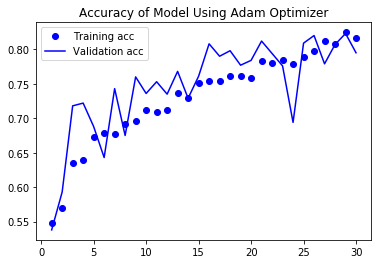

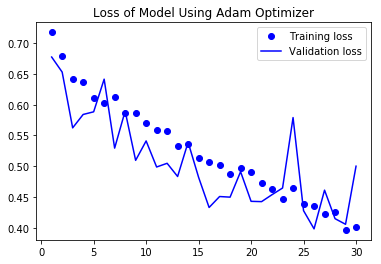

In [39]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Accuracy of Model Using Adam Optimizer')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Loss of Model Using Adam Optimizer')
plt.legend()
plt.show()

/home/minhdoan/anaconda3/envs/neural-network/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


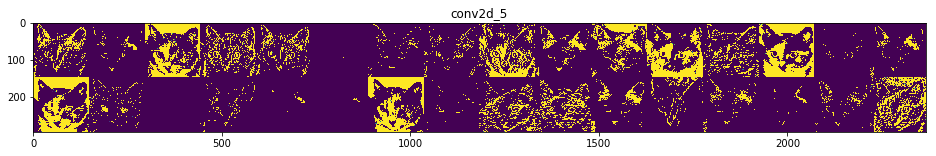

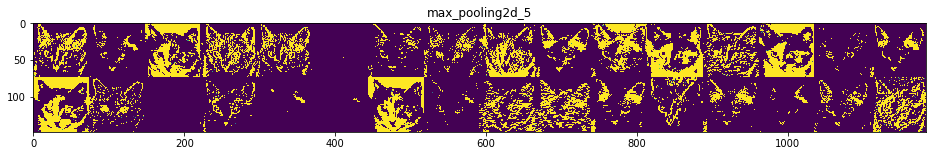

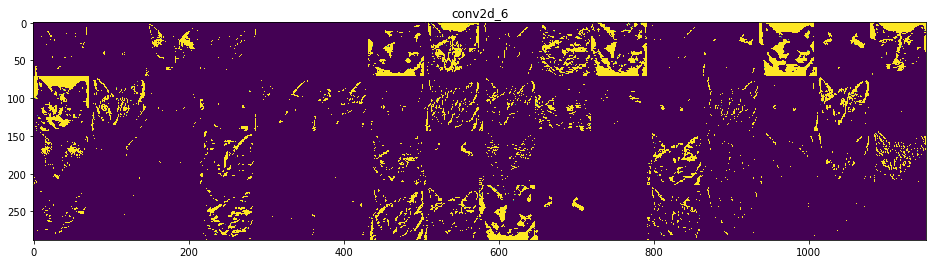

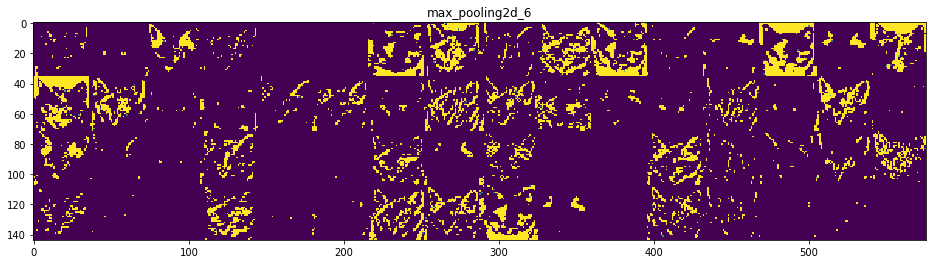

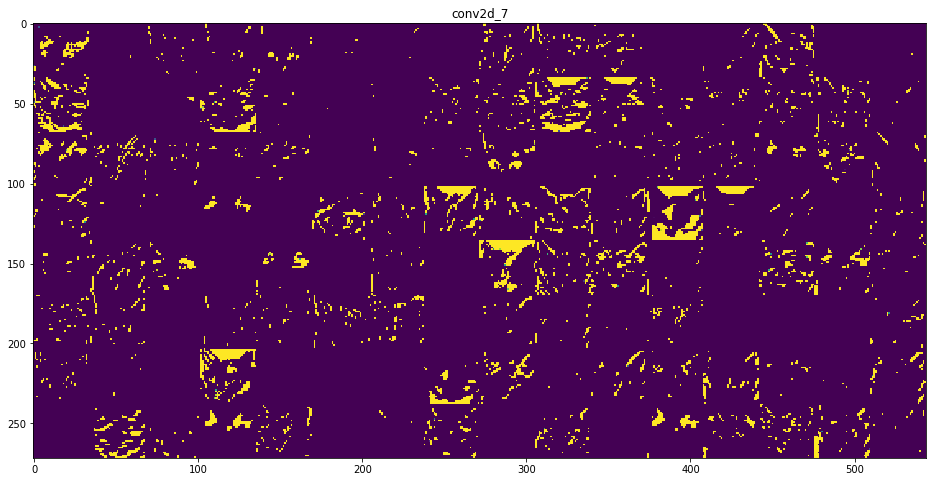

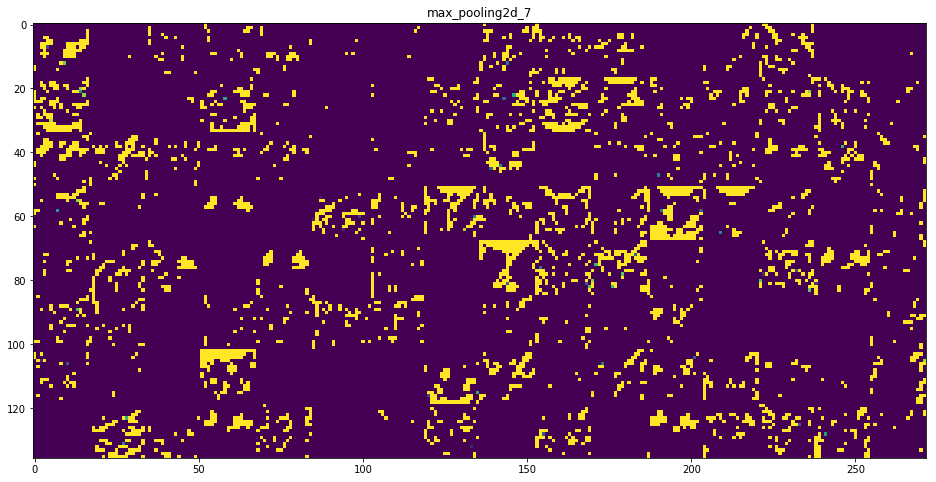

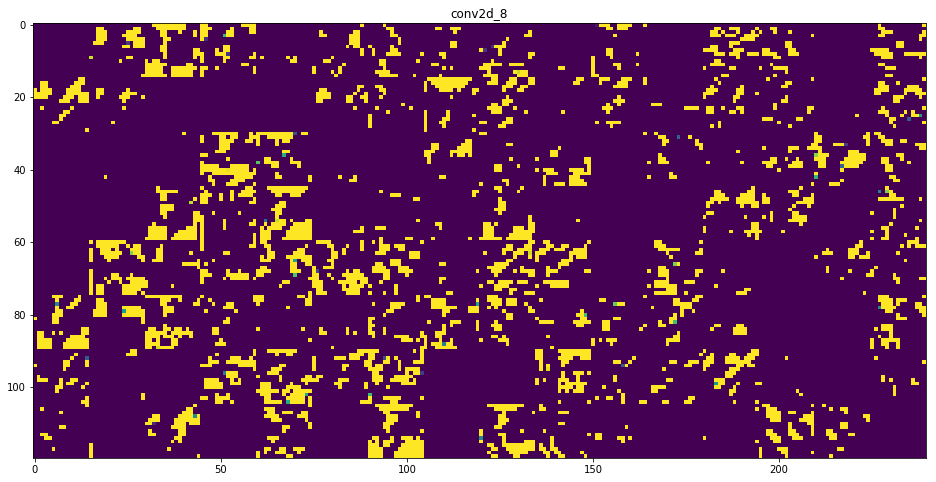

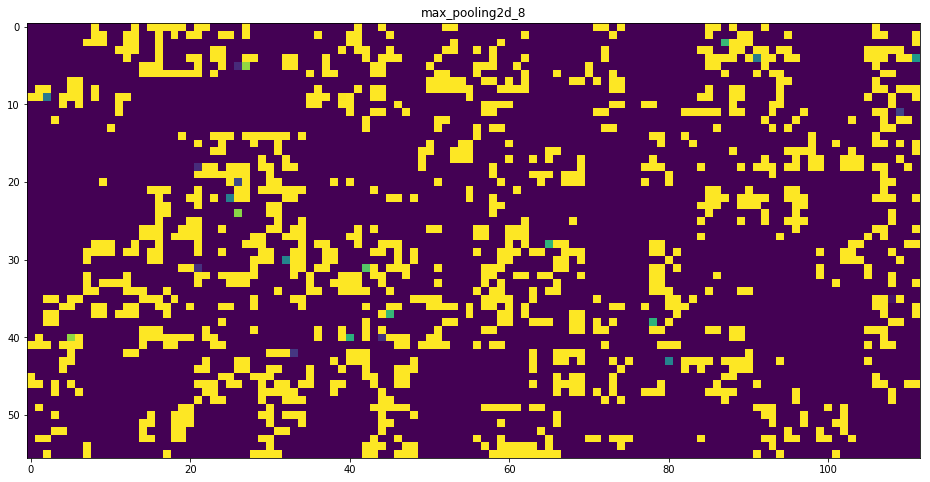

In [40]:
img_path = 'dataset/project2/cat-and-dog-small/test/cats/cat.1700.jpg'

#Preprocesses the image into a 4D tensor
img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255 #Model was trained on inputs preprocessed this way

#Extracts the outputs of the top eight layers
layer_outputs = [layer.output for layer in model_w_dropout.layers[:8]]
#Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model_w_dropout.input, outputs=layer_outputs)

#Running the model in predict mode
#Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]

#Visualizing every channel in every intermediate activation

#Names of the layers, so you can have them as part of your plot
layer_names = []
for layer in model_w_dropout.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

#Displays the feature maps
for layer_name, layer_activation in zip(layer_names, activations):
#Number of features in the feature map
    n_features = layer_activation.shape[-1]
    
#The feature map has shape (l, size, size, n_features)
    size = layer_activation.shape[1]
    
#Tiles the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
#Tiles each filter into a big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:, col * images_per_row + row]
            #Post-processes the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image *= 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            #Displays the grid
            display_grid[col * size: (col + 1) * size,
                         row * size: (row + 1) * size] = channel_image
            scale = 1. / size
    plt.figure(figsize = (scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


In [41]:
model_w_dropout.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adamax(),
              metrics=['accuracy'])

In [42]:
history4 = model_w_dropout.fit_generator(train_generator2,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 77s 772ms/step - loss: 0.3862 - acc: 0.8350 - val_loss: 0.3828 - val_acc: 0.8470
Epoch 2/30
100/100 [==============================] - 75s 746ms/step - loss: 0.3403 - acc: 0.8516 - val_loss: 0.4128 - val_acc: 0.8180
Epoch 3/30
100/100 [==============================] - 75s 751ms/step - loss: 0.3363 - acc: 0.8575 - val_loss: 0.4601 - val_acc: 0.8050
Epoch 4/30
100/100 [==============================] - 74s 745ms/step - loss: 0.3415 - acc: 0.8453 - val_loss: 0.3701 - val_acc: 0.8570
Epoch 5/30
100/100 [==============================] - 75s 746ms/step - loss: 0.3347 - acc: 0.8550 - val_loss: 0.3723 - val_acc: 0.8510
Epoch 6/30
100/100 [==============================] - 75s 748ms/step - loss: 0.3254 - acc: 0.8625 - val_loss: 0.3857 - val_acc: 0.8360
Epoch 7/30
100/100 [==============================] - 75s 751ms/step - loss: 0.2953 - acc: 0.8697 - val_loss: 0.3691 - val_acc: 0.8420
Epoch 8/30
100/100 [==============================] - 7

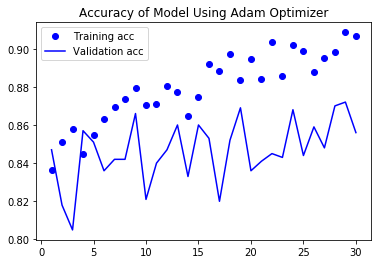

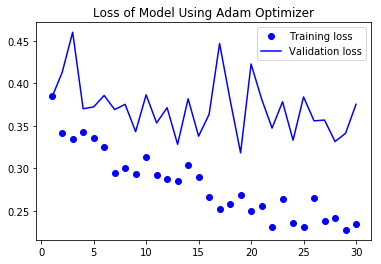

In [44]:
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Accuracy of Model Using Adam Optimizer')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Loss of Model Using Adam Optimizer')
plt.legend()
plt.show()

In [45]:
model1.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [46]:
history5 = model1.fit_generator(train_generator2,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 98s 975ms/step - loss: 0.7079 - acc: 0.5434 - val_loss: 0.6522 - val_acc: 0.6180
Epoch 2/30
100/100 [==============================] - 95s 953ms/step - loss: 0.6689 - acc: 0.5841 - val_loss: 0.6318 - val_acc: 0.6330
Epoch 3/30
100/100 [==============================] - 95s 952ms/step - loss: 0.6463 - acc: 0.6191 - val_loss: 0.6274 - val_acc: 0.6470
Epoch 4/30
100/100 [==============================] - 96s 958ms/step - loss: 0.6419 - acc: 0.6325 - val_loss: 0.6245 - val_acc: 0.6300
Epoch 5/30
100/100 [==============================] - 95s 950ms/step - loss: 0.6381 - acc: 0.6300 - val_loss: 0.6175 - val_acc: 0.6610
Epoch 6/30
100/100 [==============================] - 95s 951ms/step - loss: 0.6190 - acc: 0.6478 - val_loss: 0.5979 - val_acc: 0.6820
Epoch 7/30
100/100 [==============================] - 95s 951ms/step - loss: 0.6088 - acc: 0.6659 - val_loss: 0.6012 - val_acc: 0.6760
Epoch 8/30
100/100 [==============================] - 9

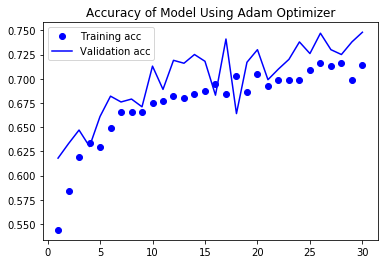

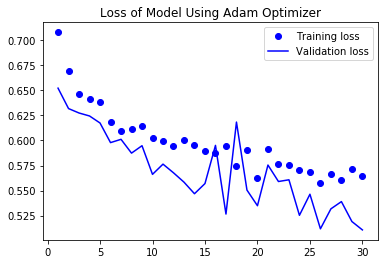

In [47]:
acc = history5.history['acc']
val_acc = history5.history['val_acc']
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Accuracy of Model Using Adam Optimizer')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Loss of Model Using Adam Optimizer')
plt.legend()
plt.show()

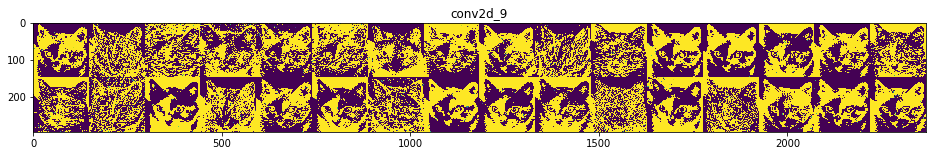

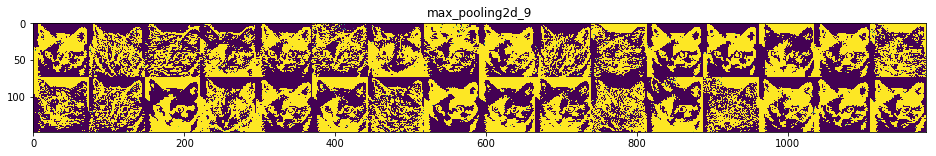

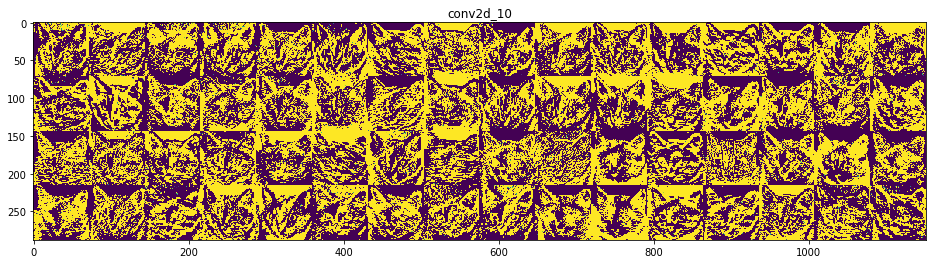

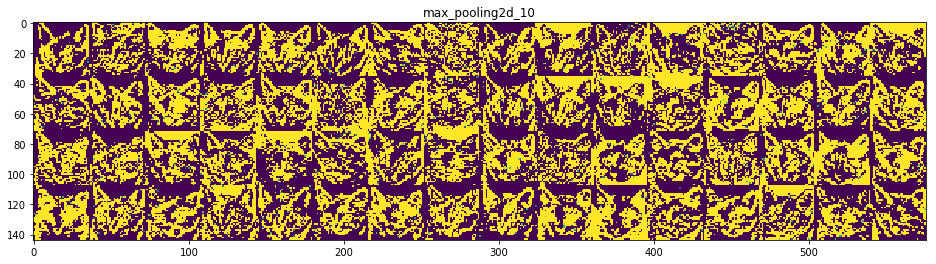

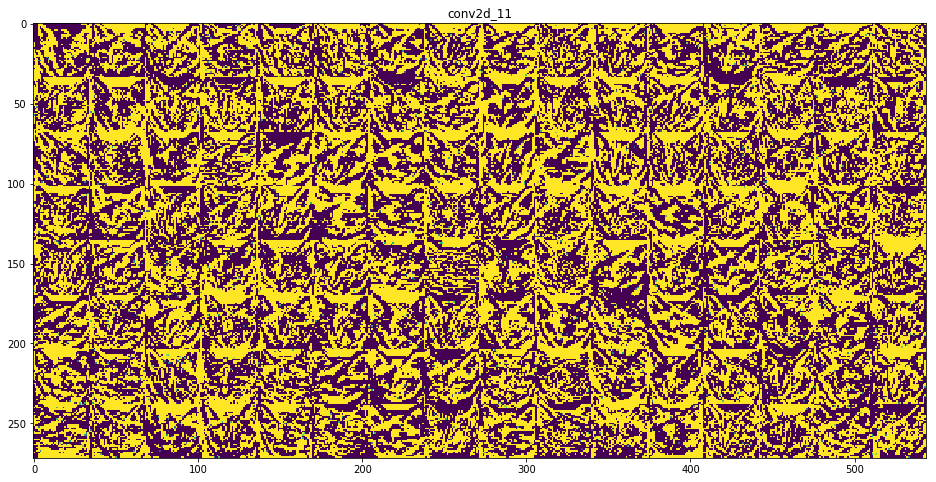

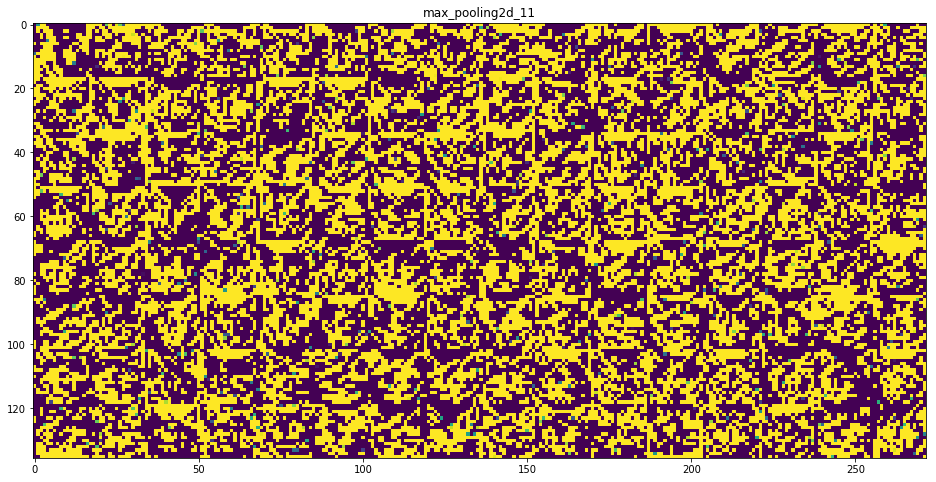

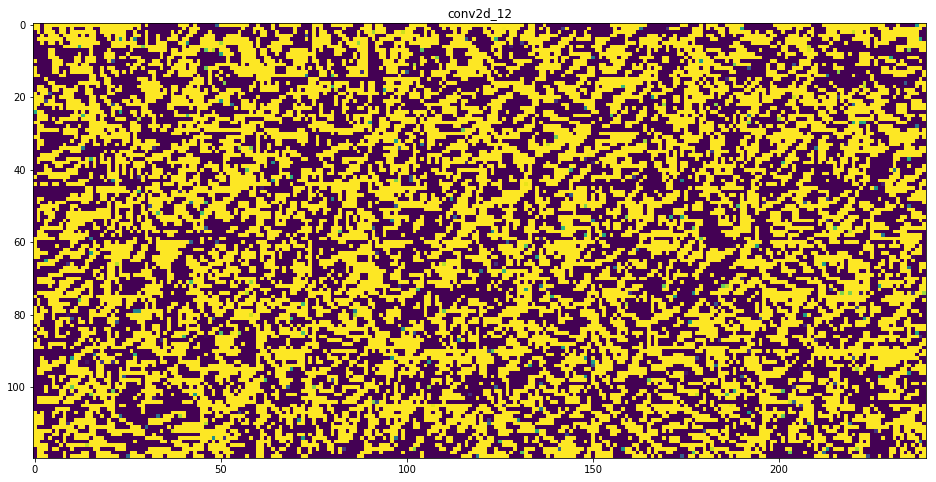

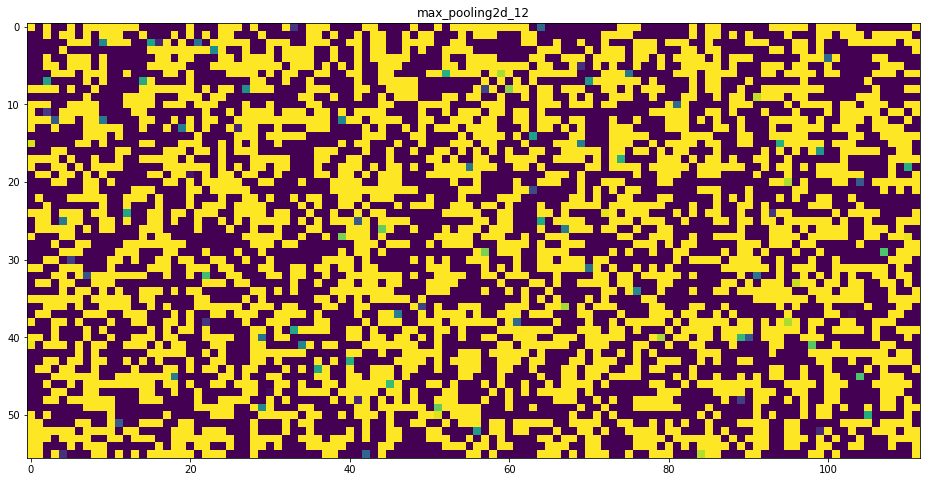

In [48]:
img_path = 'dataset/project2/cat-and-dog-small/test/cats/cat.1700.jpg'

#Preprocesses the image into a 4D tensor
img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255 #Model was trained on inputs preprocessed this way

#Extracts the outputs of the top eight layers
layer_outputs = [layer.output for layer in model1.layers[:8]]
#Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model1.input, outputs=layer_outputs)

#Running the model in predict mode
#Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]

#Visualizing every channel in every intermediate activation

#Names of the layers, so you can have them as part of your plot
layer_names = []
for layer in model1.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

#Displays the feature maps
for layer_name, layer_activation in zip(layer_names, activations):
#Number of features in the feature map
    n_features = layer_activation.shape[-1]
    
#The feature map has shape (l, size, size, n_features)
    size = layer_activation.shape[1]
    
#Tiles the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
#Tiles each filter into a big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:, col * images_per_row + row]
            #Post-processes the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image *= 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            #Displays the grid
            display_grid[col * size: (col + 1) * size,
                         row * size: (row + 1) * size] = channel_image
            scale = 1. / size
    plt.figure(figsize = (scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


In [49]:
model1.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

In [50]:
history6 = model1.fit_generator(train_generator2,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 98s 975ms/step - loss: 0.6609 - acc: 0.6425 - val_loss: 0.6105 - val_acc: 0.6660
Epoch 2/30
100/100 [==============================] - 96s 959ms/step - loss: 0.6269 - acc: 0.6528 - val_loss: 0.5974 - val_acc: 0.6780
Epoch 3/30
100/100 [==============================] - 96s 958ms/step - loss: 0.6211 - acc: 0.6584 - val_loss: 0.5934 - val_acc: 0.6770
Epoch 4/30
100/100 [==============================] - 95s 954ms/step - loss: 0.6259 - acc: 0.6559 - val_loss: 0.5345 - val_acc: 0.7480
Epoch 5/30
100/100 [==============================] - 95s 952ms/step - loss: 0.6009 - acc: 0.6747 - val_loss: 0.5754 - val_acc: 0.7050
Epoch 6/30
100/100 [==============================] - 96s 960ms/step - loss: 0.6025 - acc: 0.6834 - val_loss: 0.5681 - val_acc: 0.7080
Epoch 7/30
100/100 [==============================] - 97s 965ms/step - loss: 0.5854 - acc: 0.6881 - val_loss: 0.5156 - val_acc: 0.7340
Epoch 8/30
100/100 [==============================] - 9

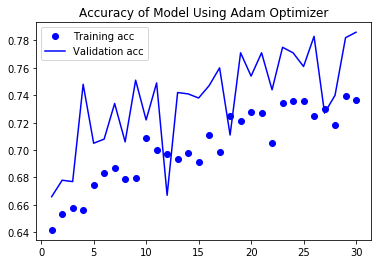

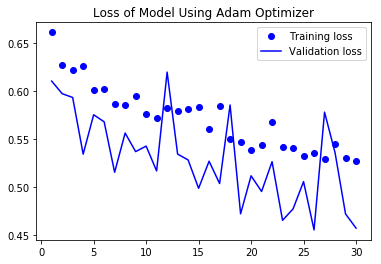

In [51]:
acc = history6.history['acc']
val_acc = history6.history['val_acc']
loss = history6.history['loss']
val_loss = history6.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Accuracy of Model Using Adam Optimizer')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Loss of Model Using Adam Optimizer')
plt.legend()
plt.show()

In [ ]:
model1.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adamax(),
              metrics=['accuracy'])

In [ ]:
history7 = model1.fit_generator(train_generator2,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)